In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# set seaborn theme
sb.set_style(style="whitegrid")
from sklearn.linear_model import LinearRegression

In [54]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [55]:
resortHotal = pd.read_csv("H1.csv")

cityHotal = pd.read_csv("H2.csv")


# add one attribute in each data set such as “Hotel”- It contains the information about the type of hotel after that we combine both datasets (i.e., city hotel or resort hotel)

In [56]:
resortHotal['Hotal'] = 'resort hotal'
resortHotal.head()
cityHotal['Hotal'] = 'city hotal'
cityHotal.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotal
0,0,342,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotal
1,0,737,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotal
2,0,7,2015,July,27,1,0,1,1,0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotal
3,0,13,2015,July,27,1,0,1,1,0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotal
4,0,14,2015,July,27,1,0,2,2,0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotal


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotal
0,0,6,2015,July,27,1,0,2,1,0.0,...,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03,city hotal
1,1,88,2015,July,27,1,0,4,2,0.0,...,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01,city hotal
2,1,65,2015,July,27,1,0,4,1,0.0,...,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30,city hotal
3,1,92,2015,July,27,1,2,4,2,0.0,...,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23,city hotal
4,1,100,2015,July,27,2,0,2,2,0.0,...,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02,city hotal


# concating the both of dataframe

In [57]:
HotalData = pd.concat([resortHotal,cityHotal],ignore_index=True)
HotalData.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotal
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotal
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotal
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotal
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotal
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotal


# Displaying Dataframe Structure

In [58]:
HotalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

# Assigning the correct data type of the Categorical attribute in the dataframe

In [59]:
HotalData[ "IsCanceled"] = HotalData[ "IsCanceled"].astype("category")
HotalData[ "ArrivalDateMonth"] = HotalData[ "ArrivalDateMonth"].astype("category")
HotalData[ "IsRepeatedGuest"] = HotalData[ "IsRepeatedGuest"].astype("category")

In [60]:
HotalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   IsCanceled                   119390 non-null  category
 1   LeadTime                     119390 non-null  int64   
 2   ArrivalDateYear              119390 non-null  int64   
 3   ArrivalDateMonth             119390 non-null  category
 4   ArrivalDateWeekNumber        119390 non-null  int64   
 5   ArrivalDateDayOfMonth        119390 non-null  int64   
 6   StaysInWeekendNights         119390 non-null  int64   
 7   StaysInWeekNights            119390 non-null  int64   
 8   Adults                       119390 non-null  int64   
 9   Children                     119386 non-null  float64 
 10  Babies                       119390 non-null  int64   
 11  Meal                         119390 non-null  object  
 12  Country                      118902 non-null

# Summary of Categorical Attribute: 

In [61]:
HotalData.IsCanceled.unique()
HotalData.groupby('IsCanceled') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
# ArrivalDateMonth
HotalData.groupby('ArrivalDateMonth') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
# Meal
HotalData.groupby('Meal') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
# Country
len(HotalData.Country.unique())
HotalData.groupby('Country') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  MarketSegment
len(HotalData.MarketSegment.unique())
HotalData.groupby('MarketSegment') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  DistributionChannel
len(HotalData.DistributionChannel.unique())
HotalData.groupby('DistributionChannel') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  IsRepeatedGuest
len(HotalData.IsRepeatedGuest.unique())
HotalData.groupby('IsRepeatedGuest') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  ReservedRoomType
len(HotalData.ReservedRoomType.unique())
HotalData.groupby('ReservedRoomType') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  AssignedRoomType
len(HotalData.AssignedRoomType.unique())
HotalData.groupby('AssignedRoomType') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  DepositType
len(HotalData.DepositType.unique())
HotalData.groupby('DepositType') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  Agent
len(HotalData.Agent.unique())
HotalData.groupby('Agent') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  Company
len(HotalData.Company.unique())
HotalData.groupby('Company') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  CustomerType
len(HotalData.CustomerType.unique())
HotalData.groupby('CustomerType') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  CustomerType
len(HotalData.CustomerType.unique())
HotalData.groupby('CustomerType') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  ReservationStatus
len(HotalData.ReservationStatus.unique())
HotalData.groupby('ReservationStatus') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)
#  Hotal
len(HotalData.Hotal.unique())
HotalData.groupby('Hotal') \
    .size() \
    .reset_index() \
    .rename(columns={0: 'Counts'}) \
    .sort_values(by='Counts', ascending=False)


[0, 1]
Categories (2, int64): [0, 1]

,IsCanceled,Counts
0,0,75166
1,1,44224


,ArrivalDateMonth,Counts
1,August,13877
5,July,12661
8,May,11791
10,October,11160
0,April,11089
6,June,10939
11,September,10508
7,March,9794
3,February,8068
9,November,6794


,Meal,Counts
0,BB,92310
2,HB,14463
3,SC,10650
4,Undefined,1169
1,FB,798


178

,Country,Counts
135,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287
...,...,...
109,MLI,1
111,MMR,1
114,MRT,1
148,SMR,1


8

,MarketSegment,Counts
6,Online TA,56477
5,Offline TA/TO,24219
4,Groups,19811
3,Direct,12606
2,Corporate,5295
1,Complementary,743
0,Aviation,237
7,Undefined,2


5

,DistributionChannel,Counts
3,TA/TO,97870
1,Direct,14645
0,Corporate,6677
2,GDS,193
4,Undefined,5


2

,IsRepeatedGuest,Counts
0,0,115580
1,1,3810


10

,ReservedRoomType,Counts
0,A,85994
3,D,19201
4,E,6535
5,F,2897
6,G,2094
1,B,1118
2,C,932
7,H,601
9,P,12
8,L,6


12

,AssignedRoomType,Counts
0,A,74053
3,D,25322
4,E,7806
5,F,3751
6,G,2553
2,C,2375
1,B,2163
7,H,712
8,I,363
9,K,279


3

,DepositType,Counts
0,No Deposit,104641
1,Non Refund,14587
2,Refundable,162


334

,Agent,Counts
8,9,31961
333,NULL,16340
173,240,13922
0,1,7191
13,14,3640
...,...,...
200,280,1
298,444,1
299,446,1
199,278,1


353

,Company,Counts
352,NULL,112593
20,40,927
131,223,784
37,67,267
23,45,250
...,...,...
172,284,1
175,288,1
281,425,1
1,8,1


4

,CustomerType,Counts
2,Transient,89613
3,Transient-Party,25124
0,Contract,4076
1,Group,577


4

,CustomerType,Counts
2,Transient,89613
3,Transient-Party,25124
0,Contract,4076
1,Group,577


3

,ReservationStatus,Counts
1,Check-Out,75166
0,Canceled,43017
2,No-Show,1207


2

,Hotal,Counts
0,city hotal,79330
1,resort hotal,40060


# Covert the data type object to date  datetime format 

In [62]:
HotalData['ReservationStatusDate'] = pd.to_datetime(HotalData['ReservationStatusDate'])

 # Summary of numerical Attribute:  

In [63]:
 round(HotalData.describe(),0)

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119386.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0
mean,104.0,2016.0,27.0,16.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,0.0,1.0
std,107.0,1.0,14.0,9.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,18.0,51.0,0.0,1.0
min,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0
25%,18.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0
50%,69.0,2016.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0
75%,160.0,2017.0,38.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,0.0,1.0
max,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,26.0,72.0,21.0,391.0,5400.0,8.0,5.0


In [64]:
round(HotalData.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
LeadTime,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
ArrivalDateYear,119390.0,2016.16,0.71,2015.00,2016.00,2016.00,2017.0,2017.0
ArrivalDateWeekNumber,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
ArrivalDateDayOfMonth,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
StaysInWeekendNights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
StaysInWeekNights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
Adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
Children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
Babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0
PreviousCancellations,119390.0,0.09,0.84,0.00,0.00,0.00,0.0,26.0


# first five row's of the data frame

In [65]:

HotalData.loc[0:5].T

,0,1,2,3,4,5
IsCanceled,0,0,0,0,0,0
LeadTime,342,737,7,13,14,14
ArrivalDateYear,2015,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2,2
Adults,2,2,1,1,2,2
Children,0,0,0,0,0,0


In [66]:
HotalData.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'Hotal'],
      dtype='object')

In [67]:
HotalData.shape

(119390, 32)

# Number of duplicated records in a dataset

In [68]:

HotalData.duplicated().sum()

31994

# remove the duplicated records in the data set

In [69]:

hotaldata = HotalData.drop_duplicates()
hotaldata.shape

(87396, 32)

# Univariant_statistics of the data frame

In [70]:
output_hotaldata= pd.DataFrame(columns= ['Count','NA','Null','Unique','dtype','Mean','Mode','Std','Min','Quantile-25%','Median','quantile-75%','Max','Skewness'])
def Univariant_statistics(hotaldata):
    for col in hotaldata:
        if pd.api.types.is_numeric_dtype(hotaldata[col]):
             output_hotaldata.loc[col] = [hotaldata[col].count(),hotaldata[col].isna().sum(),hotaldata[col].isnull().sum(),hotaldata[col].nunique(),
                                  hotaldata[col].dtype,hotaldata[col].mean(),hotaldata[col].mode().values[0],hotaldata[col].std(),hotaldata[col].min(),
                                  hotaldata[col].quantile(0.25),hotaldata[col].median(),hotaldata[col].quantile(0.75),hotaldata[col].max(),hotaldata[col].skew(axis=0,skipna=True)]
        else:
            output_hotaldata.loc[col] = [hotaldata[col].count(),hotaldata[col].isna().sum(),hotaldata[col].isnull().sum(),hotaldata[col].nunique(),
                                  hotaldata[col].dtype,'-','-','-','-','-','-','-','-','-']
    return output_hotaldata

Univariant_statistics(hotaldata)

,Count,NA,Null,Unique,dtype,Mean,Mode,Std,Min,Quantile-25%,Median,quantile-75%,Max,Skewness
IsCanceled,87396,0,0,2,category,-,-,-,-,-,-,-,-,-
LeadTime,87396,0,0,479,int64,79.8914,0,86.0523,0,11,49,125,737,1.43177
ArrivalDateYear,87396,0,0,3,int64,2016.21,2016,0.686102,2015,2016,2016,2017,2017,-0.297194
ArrivalDateMonth,87396,0,0,12,category,-,-,-,-,-,-,-,-,-
ArrivalDateWeekNumber,87396,0,0,53,int64,26.8383,33,13.6746,1,16,27,37,53,0.0225036
ArrivalDateDayOfMonth,87396,0,0,31,int64,15.8155,17,8.83515,1,8,16,23,31,0.000308252
StaysInWeekendNights,87396,0,0,17,int64,1.00526,0,1.03192,0,0,1,2,19,1.41164
StaysInWeekNights,87396,0,0,35,int64,2.62539,1,2.05358,0,1,2,4,50,2.69132
Adults,87396,0,0,14,int64,1.8758,2,0.6265,0,2,2,2,55,19.8596
Children,87392,4,4,5,float64,0.13864,0,0.455881,0,0,0,0,10,3.46357


# Check No of null values in each attribute

In [71]:
hotaldata.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        452
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

# check the unique values in Meal Attribute

In [72]:
hotaldata.Meal.unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

# check the unique values in DistributionChannel Attribute

In [73]:
hotaldata.DistributionChannel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

# check the unique values in Country Attribute

In [74]:
hotaldata.Country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

# check the unique values in CustomerType Attribute

In [75]:
hotaldata.CustomerType.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

# Check data with null values

In [76]:

hotaldata[hotaldata.isnull().any(axis=1)].head(20)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotal
30,0,118,2015,July,27,1,4,10,1,0.0,...,NULL,NULL,0,Transient,62.0,0,2,Check-Out,2015-07-15,resort hotal
4127,1,0,2016,February,8,15,0,0,0,0.0,...,NULL,383,0,Transient,0.0,0,0,Canceled,2016-02-15,resort hotal
7092,1,8,2016,July,30,21,0,1,1,0.0,...,NULL,204,0,Transient,73.0,0,2,Canceled,2016-07-20,resort hotal
7860,1,39,2016,August,36,30,0,5,2,0.0,...,NULL,NULL,0,Transient,159.0,0,5,Canceled,2016-07-22,resort hotal
8779,1,0,2016,October,42,13,0,1,1,0.0,...,NULL,457,0,Transient,50.0,0,0,Canceled,2016-10-13,resort hotal
9376,1,0,2016,November,48,21,0,0,0,0.0,...,NULL,386,0,Group,0.0,0,0,Canceled,2016-11-21,resort hotal
9610,1,4,2016,December,52,20,0,1,1,0.0,...,NULL,204,0,Transient,30.0,0,2,Canceled,2016-12-19,resort hotal
11262,1,87,2017,April,18,30,2,3,2,0.0,...,6,NULL,0,Transient,48.0,0,0,Canceled,2017-02-02,resort hotal
13803,0,7,2016,January,3,13,0,2,1,0.0,...,94,NULL,0,Transient,27.0,0,0,Check-Out,2016-01-15,resort hotal
13804,0,7,2016,January,4,18,1,3,1,0.0,...,NULL,94,0,Transient,28.5,1,0,Check-Out,2016-01-22,resort hotal


# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.

In [77]:

nan_replacements = {"Children:": 0.0,"Country": "Unknown", "Agent": 0, "Company": 0}
hotaldata_clean = hotaldata.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
# Meal types
# Undefined/SC = No meal package
# BB = Breakfast and dinner
# HB = Half board (Breakfast and one other meal – usually dinner)
# FB = Full board (Breakfast, lunch and dinner)

In [78]:

hotaldata_clean["Meal"].replace("Undefined", "SC", inplace=True)
hotaldata_clean.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [79]:
hotaldata_clean_no_adult = hotaldata_clean[(hotaldata_clean["Adults"]==0 )]
hotaldata_clean_no_adult_no_children = hotaldata_clean_no_adult[hotaldata_clean_no_adult["Children"]==0]
hotaldata_clean_no_adult_no_children_no_babies = hotaldata_clean_no_adult_no_children[hotaldata_clean_no_adult_no_children["Babies"]==0]
hotaldata_clean.drop(hotaldata_clean_no_adult_no_children_no_babies.index, inplace = True)

# check unique values in Children attribute

In [80]:
hotaldata_clean["Children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# total number of na values in Children attribute

In [81]:
hotaldata_clean["Children"].isnull().sum()

4

In [82]:
hotaldata_clean["Children"].isna().sum()

4

 # calculating mean to inplace with null values in children attribue

In [83]:
mean_age= round(hotaldata_clean['Children'].mean(),0)
print(mean_age)

0.0


# Replacing na values with mean of the children attribute

In [84]:
hotaldata_clean['Children'].fillna(value=mean_age,inplace=True)
hotaldata_clean.isnull().values.any().sum()

0

# Correlation matrix 

In [85]:
corr = hotaldata_clean.corr()
corr

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
LeadTime,1.000000,0.139408,0.101295,0.009899,0.236316,0.312506,0.139033,0.028395,-0.003705,0.005370,-0.079021,0.080822,0.131909,0.021948,-0.086736,0.034048
ArrivalDateYear,0.139408,1.000000,-0.513895,-0.009872,0.005277,0.003765,0.038744,0.041178,-0.023366,-0.054284,0.027266,0.008944,-0.027490,0.176594,-0.040041,0.064210
ArrivalDateWeekNumber,0.101295,-0.513895,1.000000,0.093273,0.027466,0.028498,0.025322,0.013542,0.014302,0.007038,-0.020938,0.012943,0.013159,0.099092,0.009054,0.046759
ArrivalDateDayOfMonth,0.009899,-0.009872,0.093273,1.000000,-0.017636,-0.028375,-0.001235,0.015826,-0.000397,-0.008553,0.000148,0.007006,0.006088,0.022682,0.009040,-0.001677
StaysInWeekendNights,0.236316,0.005277,0.027466,-0.017636,1.000000,0.550471,0.091450,0.028911,0.013802,-0.020641,-0.056891,0.034624,-0.031980,0.040417,-0.042979,0.032816
StaysInWeekNights,0.312506,0.003765,0.028498,-0.028375,0.550471,1.000000,0.099323,0.030936,0.016201,-0.018696,-0.058714,0.066425,0.001855,0.055084,-0.044484,0.038336
Adults,0.139033,0.038744,0.025322,-0.001235,0.091450,0.099323,1.000000,0.022171,0.016236,-0.042389,-0.122105,-0.036446,-0.014925,0.241996,0.007015,0.112509
Children,0.028395,0.041178,0.013542,0.015826,0.028911,0.030936,0.022171,1.000000,0.017370,-0.019208,-0.029446,0.033409,-0.020370,0.326359,0.036267,0.044503
Babies,-0.003705,-0.023366,0.014302,-0.000397,0.013802,0.016201,0.016236,0.017370,1.000000,-0.005394,-0.009199,0.083425,-0.006825,0.023206,0.030873,0.094857
PreviousCancellations,0.005370,-0.054284,0.007038,-0.008553,-0.020641,-0.018696,-0.042389,-0.019208,-0.005394,1.000000,0.391766,-0.010267,0.003733,-0.050359,-0.003480,0.001695


# Graphical Representation of Correlation matrix 

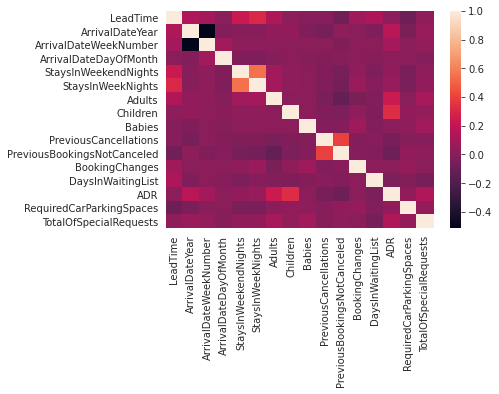

In [86]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)